In [1]:
print("hello world")

hello world


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('trains.csv')

In [4]:
df.sample(5)

,Unnamed: 0,train_name,train_number,source,destination,distance,total_time,departure,arrival
1491,1492,Lokmanya Tilak (T)-Kamakhya Karmabhoomi Express,15611,LOKMANYA TILAK TERM,KAMAKHYA,2942.0,2 days 07:50:00,11:25:00,19:15:00
4395,4396,Ambikapur Shahdol Passenger,58702,AMBIKAPUR,SHAHDOL,216.0,0 days 05:20:00,07:45:00,13:05:00
4972,4973,Kochuveli-Yesvantpur Garib Rath,12258,KOCHUVELI,YESVANTPUR JN,808.0,0 days 16:30:00,16:35:00,09:05:00
176,177,Mahalaxmi Express,11011,MUMBAI CST,C SHAHU M RAJ KOLHAPUR TERM,518.0,0 days 10:57:00,20:23:00,07:20:00
4639,4640,Danapur Mokameh passenger,63218,DANAPUR,MOKAMEH JN,99.0,0 days 03:25:00,18:20:00,21:45:00


In [5]:
df.isnull().sum()

Unnamed: 0       0
train_name       1
train_number     0
source           0
destination      0
distance        15
total_time      15
departure       15
arrival         15
dtype: int64

### Univariate Analysis
---

(array([1080.,  885.,  530.,  362.,  257.,  191.,  228.,  157.,  129.,
         108.,   91.,   67.,   96.,   67.,   43.,   35.,   55.,   33.,
          41.,   45.,   44.,   69.,   34.,   53.,   44.,   49.,   42.,
          54.,   31.,   29.,   32.,   10.,   19.,   15.,   27.,   25.,
          17.,   17.,   10.,   10.,    8.,   10.,    6.,    2.,    6.,
           4.,    2.,    4.,    4.,    4.,    7.,    0.,    2.,    0.,
           0.,    0.,    0.,    0.,    0.,    2.]),
 array([   0.        ,   71.31666667,  142.63333333,  213.95      ,
         285.26666667,  356.58333333,  427.9       ,  499.21666667,
         570.53333333,  641.85      ,  713.16666667,  784.48333333,
         855.8       ,  927.11666667,  998.43333333, 1069.75      ,
        1141.06666667, 1212.38333333, 1283.7       , 1355.01666667,
        1426.33333333, 1497.65      , 1568.96666667, 1640.28333333,
        1711.6       , 1782.91666667, 1854.23333333, 1925.55      ,
        1996.86666667, 2068.18333333, 2139.5  

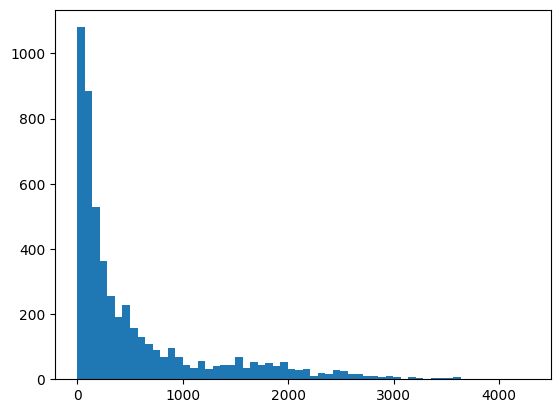

In [6]:
plt.hist(df['distance'], bins=60)

Text(0.5, 0, 'distance')

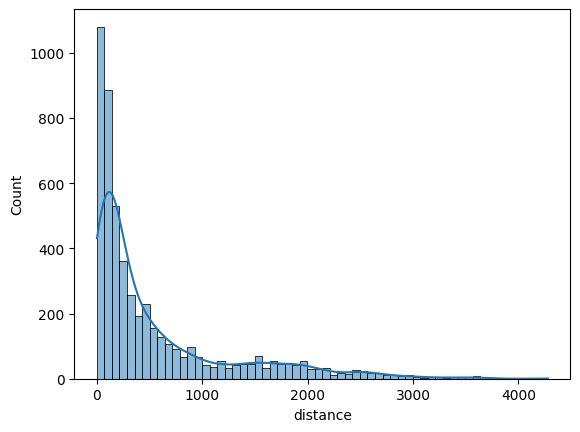

In [7]:
import seaborn as sns

# plot distribution of distance without errors (drop NaNs)
sns.histplot(df['distance'].dropna(), bins=60, kde=True)
plt.xlabel('distance')

<Axes: xlabel='distance'>

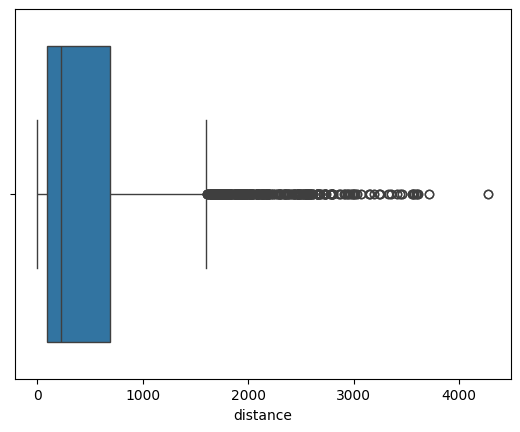

In [8]:
sns.boxplot(x=df['distance'])

In [9]:
df.describe()

,Unnamed: 0,distance
count,5207.000000,5192.000000
mean,2603.999616,544.864022
std,1503.276422,696.824792
min,0.000000,0.000000
25%,1302.500000,88.000000
50%,2604.000000,227.000000
75%,3905.500000,693.000000
max,5207.000000,4279.000000


### Multivariate Analysis
---

In [10]:
df.dropna().head()

,Unnamed: 0,train_name,train_number,source,destination,distance,total_time,departure,arrival
0,0,Jammu Tawi Udhampur Special,04601,JAMMU TAWI,UDHAMPUR,53.0,0 days 01:35:00,10:40:00,12:15:00
1,1,JAT UDAHMPUR DMU,04603,JAMMU TAWI,UDHAMPUR,53.0,0 days 01:35:00,16:15:00,17:50:00
2,3,UDHAMPUR JAMMUTAWI DMU,04604,UDHAMPUR,JAMMU TAWI,53.0,0 days 01:30:00,18:20:00,19:50:00
3,4,Mumbai BandraT-Bikaner SF Special,04728,MUMBAI BANDRA TERMINUS,BIKANER JN,1212.0,0 days 21:55:00,14:35:00,12:30:00
4,5,Sirsa - Hisar Passenger Special,04741,Sirsa,Hisar,82.0,0 days 01:35:00,22:50:00,00:25:00


<Axes: xlabel='distance', ylabel='total_time'>

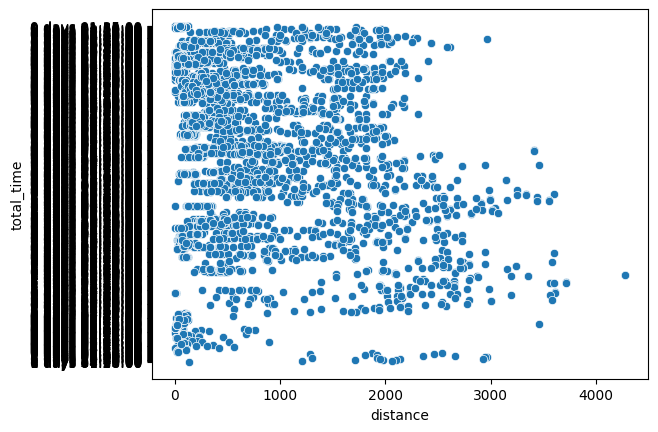

In [11]:
sns.scatterplot(x='distance', y='total_time', data=df)

In [12]:
df['total_time'].dtype

dtype('O')

In [13]:
df['total_time'] = pd.to_timedelta(df['total_time'])

In [14]:
df['total_time_hours'] = df['total_time'].dt.total_seconds() / 3600

<Axes: xlabel='distance', ylabel='total_time_hours'>

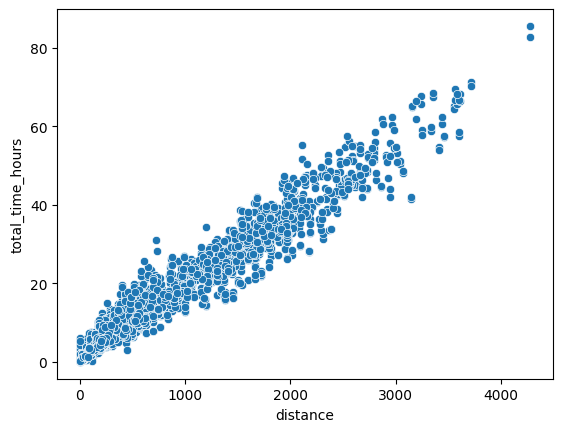

In [15]:
sns.scatterplot(x='distance', y='total_time_hours', data=df)

<Axes: xlabel='distance', ylabel='Count'>

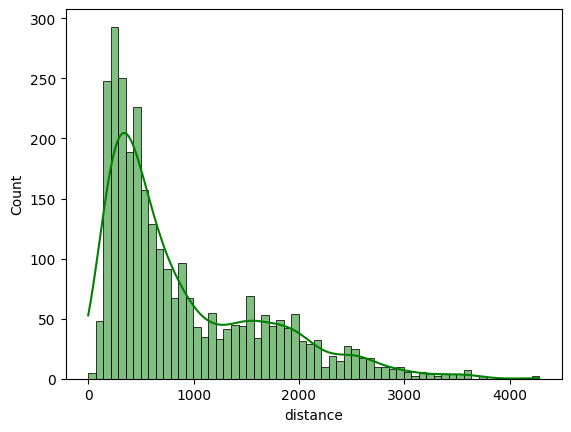

In [16]:
sns.histplot(df[df['total_time_hours'] > 5]['distance'], bins=60, kde=True, color='green')

<Axes: xlabel='speed', ylabel='Count'>

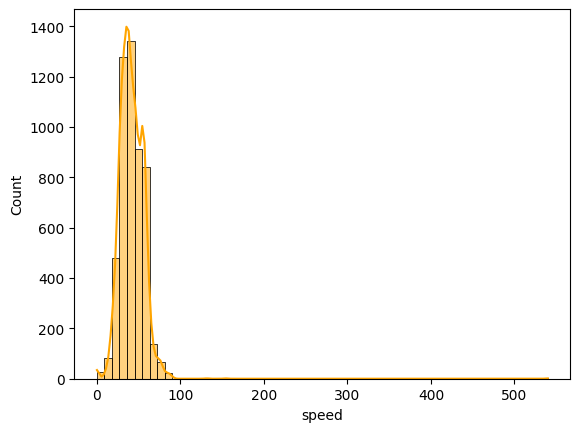

In [17]:
df['speed'] = df['distance'] / df['total_time_hours']
sns.histplot(df['speed'], bins=60, kde=True, color='orange')


<Axes: xlabel='speed'>

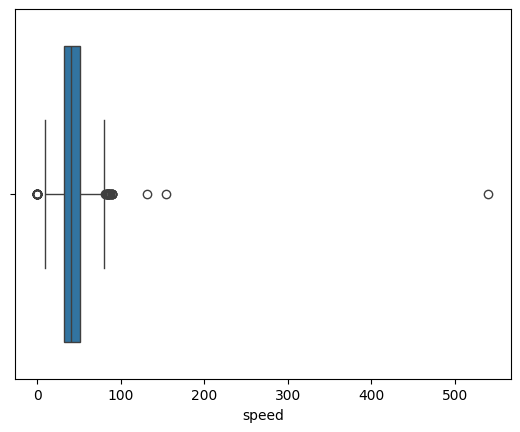

In [18]:
sns.boxplot(x=df['speed'])

therefore we have an outlier in speed that goes beyong 500km/h.

In [19]:
df['dist_bin']=pd.cut(df['distance'], bins=10)
df.groupby('dist_bin')['speed'].mean()

C:\Users\rama2\AppData\Local\Temp\ipykernel_3296\2525401839.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('dist_bin')['speed'].mean()


dist_bin
(-4.279, 427.9]     35.523692
(427.9, 855.8]      48.966037
(855.8, 1283.7]     51.715241
(1283.7, 1711.6]    55.961597
(1711.6, 2139.5]    55.361137
(2139.5, 2567.4]    55.954656
(2567.4, 2995.3]    54.983846
(2995.3, 3423.2]    56.910388
(3423.2, 3851.1]    55.567486
(3851.1, 4279.0]    50.898392
Name: speed, dtype: float64